# Project 2 - Ames Housing Data and Kaggle Challenge

---

## Part 2: Modelling and Recommendations

---

## Contents:

- [Exploratory Data Analysis](#Exploratory-Data-Analysis)
- [Modelling](#Modelling)
- [Summary](#Summary)
- [Conclusions](#Conclusions)
- [Prediction for Test dataset](#Prediction-for-Test-dataset)



## Exploratory Data Analysis

#### Import libraries

In [1]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statistics

from sklearn.linear_model import LinearRegression, Ridge, RidgeCV, Lasso, LassoCV
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.metrics import mean_squared_error


#### Read in datasets

In [2]:
# Import datasets

train = pd.read_csv('../datasets/train_clean.csv')
test = pd.read_csv('../datasets/test_clean.csv')
test_original = pd.read_csv('../datasets/test.csv')

In [3]:
#set to view all columns
pd.set_option('display.max_columns', 100)

In [4]:
train.head()

,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Mas Vnr Area,Exter Qual,Bsmt Qual,BsmtFin Type 1,BsmtFin SF 1,Total Bsmt SF,Heating QC,2nd Flr SF,Gr Liv Area,Full Bath,Bedroom AbvGr,Kitchen Qual,Fireplaces,Garage Cars,Wood Deck SF,Open Porch SF,Enclosed Porch,Property Age,Yrs Since Remod,MS Zoning_FV,MS Zoning_I (all),MS Zoning_RH,MS Zoning_RL,MS Zoning_RM,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_Greens,Neighborhood_GrnHill,Neighborhood_IDOTRR,Neighborhood_Landmrk,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,House Style_1.5Unf,House Style_1Story,House Style_2.5Fin,House Style_2.5Unf,House Style_2Story,House Style_SFoyer,House Style_SLvl,Exterior 1st_AsphShn,Exterior 1st_BrkComm,Exterior 1st_BrkFace,Exterior 1st_CBlock,Exterior 1st_CemntBd,Exterior 1st_HdBoard,Exterior 1st_ImStucc,Exterior 1st_MetalSd,Exterior 1st_Plywood,Exterior 1st_PreCast,Exterior 1st_Stone,Exterior 1st_Stucco,Exterior 1st_VinylSd,Exterior 1st_Wd Sdng,Exterior 1st_WdShing,Mas Vnr Type_BrkFace,Mas Vnr Type_CBlock,Mas Vnr Type_None,Mas Vnr Type_Stone,Garage Type_Attchd,Garage Type_Basment,Garage Type_BuiltIn,Garage Type_CarPort,Garage Type_Detchd,Garage Type_NA,SalePrice
0,68.738497,13517,6,8,289.0,3,3,6,533.0,725.0,4,754,1479,2,3,3,0,2.0,0,44,0,34,5,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,130500
1,43.000000,11492,7,5,132.0,3,4,6,637.0,913.0,4,1209,2122,2,4,3,1,2.0,0,74,0,13,12,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,220000
2,68.000000,7922,5,7,0.0,2,3,6,731.0,1057.0,2,0,1057,1,3,3,0,1.0,0,52,0,57,3,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,109000
3,73.000000,9802,5,5,0.0,2,4,1,0.0,384.0,3,700,1444,2,3,2,0,2.0,100,0,0,4,3,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,174000
4,82.000000,14235,6,8,0.0,2,2,1,0.0,676.0,2,614,1445,2,3,2,0,2.0,0,59,0,110,17,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,138500


In [5]:
test.head()

,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Mas Vnr Area,Exter Qual,Bsmt Qual,BsmtFin Type 1,BsmtFin SF 1,Total Bsmt SF,Heating QC,2nd Flr SF,Gr Liv Area,Full Bath,Bedroom AbvGr,Kitchen Qual,Fireplaces,Garage Cars,Wood Deck SF,Open Porch SF,Enclosed Porch,Property Age,Yrs Since Remod,MS Zoning_FV,MS Zoning_I (all),MS Zoning_RH,MS Zoning_RL,MS Zoning_RM,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_Greens,Neighborhood_GrnHill,Neighborhood_IDOTRR,Neighborhood_Landmrk,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,House Style_1.5Unf,House Style_1Story,House Style_2.5Fin,House Style_2.5Unf,House Style_2Story,House Style_SFoyer,House Style_SLvl,Exterior 1st_AsphShn,Exterior 1st_BrkComm,Exterior 1st_BrkFace,Exterior 1st_CBlock,Exterior 1st_CemntBd,Exterior 1st_HdBoard,Exterior 1st_ImStucc,Exterior 1st_MetalSd,Exterior 1st_Plywood,Exterior 1st_PreCast,Exterior 1st_Stone,Exterior 1st_Stucco,Exterior 1st_VinylSd,Exterior 1st_Wd Sdng,Exterior 1st_WdShing,Mas Vnr Type_BrkFace,Mas Vnr Type_CBlock,Mas Vnr Type_None,Mas Vnr Type_Stone,Garage Type_Attchd,Garage Type_Basment,Garage Type_BuiltIn,Garage Type_CarPort,Garage Type_Detchd,Garage Type_NA
0,69.000000,9142,6,8,0.0,2,2,1,0.0,1020.0,3,1020,1928,2,4,1,0,1.0,0,60,112,96,56,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
1,69.545961,9662,5,4,0.0,2,4,1,0.0,1967.0,2,0,1967,2,6,2,0,2.0,170,0,0,29,29,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0
2,58.000000,17104,7,5,0.0,3,4,6,554.0,654.0,4,832,1496,2,3,3,1,2.0,100,24,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0
3,60.000000,8520,5,6,0.0,3,3,1,0.0,968.0,2,0,968,1,2,2,0,2.0,0,0,184,84,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0
4,69.545961,9500,6,5,247.0,2,4,4,609.0,1394.0,3,0,1394,1,3,2,2,2.0,0,76,0,46,46,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0


In [6]:
train.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2023 entries, 0 to 2022
Data columns (total 88 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Lot Frontage          2023 non-null   float64
 1   Lot Area              2023 non-null   int64  
 2   Overall Qual          2023 non-null   int64  
 3   Overall Cond          2023 non-null   int64  
 4   Mas Vnr Area          2023 non-null   float64
 5   Exter Qual            2023 non-null   int64  
 6   Bsmt Qual             2023 non-null   int64  
 7   BsmtFin Type 1        2023 non-null   int64  
 8   BsmtFin SF 1          2023 non-null   float64
 9   Total Bsmt SF         2023 non-null   float64
 10  Heating QC            2023 non-null   int64  
 11  2nd Flr SF            2023 non-null   int64  
 12  Gr Liv Area           2023 non-null   int64  
 13  Full Bath             2023 non-null   int64  
 14  Bedroom AbvGr         2023 non-null   int64  
 15  Kitchen Qual         

There are 88 features currently in the dataset. To reduce variance in our models, we will reduce the features to be used by filtering of correlation coefficients with SalePrice, more than 0.1 and less than -0.1.

#### Filtering list of features

In [7]:
features = train.columns
new_list = []
for col in features:
    if abs(train.corr()['SalePrice'][col]) >= 0.1:
        new_list.append(col)
        
new_list
len(new_list)

52

We have filtered to 52 features, including SalePrice.

In [8]:
train[new_list].corr()[['SalePrice']].sort_values(by='SalePrice', ascending=False)

,SalePrice
SalePrice,1.000000
Overall Qual,0.801175
Gr Liv Area,0.717287
Exter Qual,0.714069
Kitchen Qual,0.691250
Total Bsmt SF,0.660943
Garage Cars,0.645765
Bsmt Qual,0.609519
Full Bath,0.531740
Mas Vnr Area,0.515381


Most positively correlated features: Overall Qual, Gr Liv Area, Exter Qual <br>
Most negatively correlated features: Property Age, Yrs Since Remod

We will use the regression models to find out whether these features still has the highest correlations. 

#### Export dataset to be used for modelling

In [9]:
train_final = train[new_list]

In [10]:
train_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2023 entries, 0 to 2022
Data columns (total 52 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Lot Frontage          2023 non-null   float64
 1   Lot Area              2023 non-null   int64  
 2   Overall Qual          2023 non-null   int64  
 3   Overall Cond          2023 non-null   int64  
 4   Mas Vnr Area          2023 non-null   float64
 5   Exter Qual            2023 non-null   int64  
 6   Bsmt Qual             2023 non-null   int64  
 7   BsmtFin Type 1        2023 non-null   int64  
 8   BsmtFin SF 1          2023 non-null   float64
 9   Total Bsmt SF         2023 non-null   float64
 10  Heating QC            2023 non-null   int64  
 11  2nd Flr SF            2023 non-null   int64  
 12  Gr Liv Area           2023 non-null   int64  
 13  Full Bath             2023 non-null   int64  
 14  Bedroom AbvGr         2023 non-null   int64  
 15  Kitchen Qual         

In [11]:
# # Save as csv format
train_final.to_csv("../datasets/train_final.csv", index=False)


#### Split data into training and validation sets

In [12]:
new_list.remove('SalePrice')

In [13]:
X = train[new_list]
y = train['SalePrice']

In [14]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
X_train.shape, y_train.shape

((1618, 51), (1618,))

In [16]:
X_valid.shape, y_valid.shape

((405, 51), (405,))

#### Scale training and validation sets

In [17]:
ss = StandardScaler()
X_train_sc = ss.fit_transform(X_train)
X_valid_sc = ss.transform(X_valid)

## Modelling

The train and validaton datasets will be put into OLS, Ridge and Lasso models. We will determine the scores from each model by cross-validation, identify the highest scoring model as the best performing one and use this model for our prediction. The Root Mean Squared Error will also be calculated from each model before using the chosen model to predict the Sale Price from our test dataset.

### Baseline Sale Price

We will first establish a baseline Sale Price for our prediction before running the regression models. The mean of Sale Price will be taken as the baseline. The regression models should perform better and provide a better prediction by obtaining a lower RMSE.

In [18]:
train['SalePrice'].mean()

182479.5234799802

In [19]:
resi = [num - train['SalePrice'].mean() for num in list(y_train)]
resi_sq = [ val ** 2 for val in resi]
rmse = np.mean(resi_sq) ** 0.5
rmse

80299.51493793099

### Ordinary Least Squares Linear Regression (OLS)

In [20]:
lr = LinearRegression()

In [21]:
lr.fit(X_train_sc, y_train)

LinearRegression()

In [22]:
# Linear Regression Train Score
lr.score(X_train_sc, y_train)

0.9027484209162678

In [23]:
# Linear Regression Validation Score
lr.score(X_valid_sc, y_valid)

0.8737364764521038

In [24]:
# Cross Val Score
cross_val_score(lr, X_train_sc, y_train, cv=10).mean()

0.8904570292868902

In [25]:
lr_rmse = -cross_val_score(lr, X_train_sc, y_train, cv=10, scoring ='neg_root_mean_squared_error').mean()
lr_rmse

26276.75785108642

### Ridge

In [26]:
ridge_model = Ridge(alpha=10)

ridge_model.fit(X_train_sc, y_train)

print(ridge_model.score(X_train_sc, y_train))
print(ridge_model.score(X_valid_sc, y_valid))

0.9027142967690986
0.8744941889250899


Finding optimal alpha

In [27]:
%%time
ridge_alphas = np.logspace(0, 5, 200)

optimal_ridge = RidgeCV(alphas=ridge_alphas, cv=10)
optimal_ridge.fit(X_train_sc, y_train)

print (optimal_ridge.alpha_)

38.27494478516313
CPU times: total: 12.9 s
Wall time: 3.22 s


In [28]:
ridge_cv = Ridge(alpha=optimal_ridge.alpha_)

ridge_cv.fit(X_train_sc, y_train)

print(ridge_cv.score(X_train_sc, y_train))
print(ridge_cv.score(X_valid_sc, y_valid))

ridge_scores = cross_val_score(ridge_cv, X_train, y_train, cv=10).mean()
print(ridge_scores)

0.9023896381597812
0.8760746074202724
0.8888418958863266


In [29]:
ridge_scores = -cross_val_score(ridge_cv, X_train_sc, y_train, cv=10, scoring ='neg_root_mean_squared_error').mean()
ridge_scores

26213.086613480762

### LASSO

In [30]:
optimal_lasso = LassoCV(cv=10, verbose=1)
optimal_lasso.fit(X_train_sc, y_train)

print (optimal_lasso.alpha_)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
.......................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

209.4531301131997


....................[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.1s finished


In [31]:
lasso = Lasso(alpha=optimal_lasso.alpha_)
lasso.fit(X_train_sc, y_train)

print(lasso.score(X_train_sc, y_train))
print(lasso.score(X_valid_sc, y_valid))

0.9020338766418112
0.8764205176425914


In [32]:
lasso_scores = cross_val_score(lasso, X_train_sc, y_train, cv=10).mean()
print(lasso_scores)

0.8907673902163511


In [33]:
lasso_rmse = -cross_val_score(lasso, X_train_sc, y_train, cv=10, scoring ='neg_root_mean_squared_error').mean()
lasso_rmse

26243.6476975007

## Summary

| Regression Model | Train   | Validation | Cross Val Score | RMSE  | $\alpha$ |
|------------------|---------|------------|-----------------|-------|----------|
| Baseline         | ---     | ---        | ---             | 80299 | ---      |
| OLS              | 0.90275 | 0.87373    | 0.89046         | 26276 | ---      |
| Ridge            | 0.90239 | 0.87607    | 0.88884         | 26213 | 38.27    |
| LASSO            | 0.90203 | 0.87642    | 0.89077         | 26243 | 209.45   |


Results from the various models are summarised in the table above. 

The Lasso model obtained the highest cross validation score amongst the models. As Lasso works to shrink the less important feature's coefficient to zero, these features were removed and thus improved the model. This is worked well for us given the large number of features used. The model did not perform significantly better than OLS as there are few features removed.

The Ridge model did not obtain a better score than OLS and Lasso. Ridge regularisaton works to reduce the effect of collinearity of features. The additional biasness and penalty term imposed did not improve the accuracy of the model. This showed that such coefficient penalised regression techniques does not always perform better for prediction. We noted that the RSME from Ridge has improved but that is dependent and subjective to the test (validation) dataset used. We can evaluate by running both models with the test dataset.


In [34]:
lasso_df = pd.DataFrame({"feature": new_list, "coef": lasso.coef_})

In [35]:
lasso_df.sort_values(by='coef', ascending = False)

,feature,coef
12,Gr Liv Area,26444.538667
2,Overall Qual,14399.790349
8,BsmtFin SF 1,10844.276190
4,Mas Vnr Area,9690.819629
5,Exter Qual,8022.793544
9,Total Bsmt SF,6902.805502
1,Lot Area,6714.756633
36,Neighborhood_StoneBr,6554.019967
32,Neighborhood_NridgHt,6140.866998
15,Kitchen Qual,5514.239542


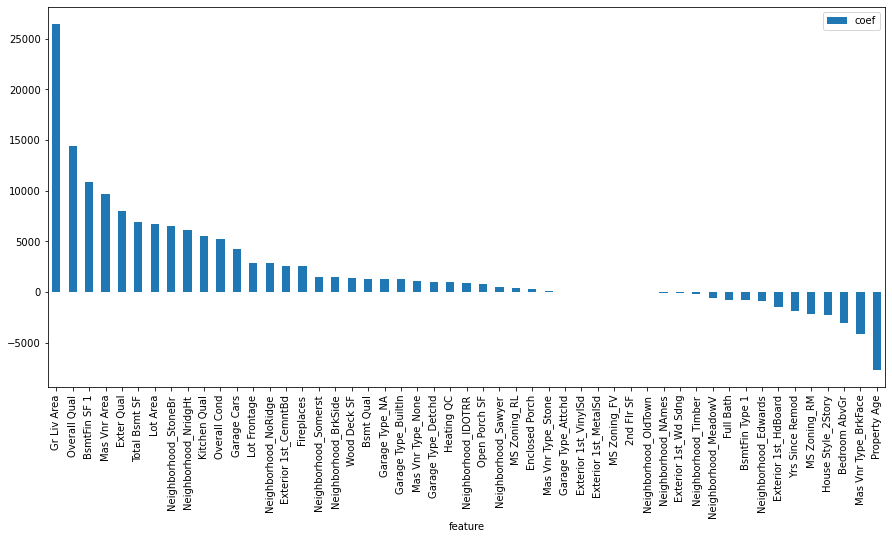

In [36]:
lasso_df.sort_values(by='coef', ascending = False).plot(kind='bar', x='feature', figsize=(15,7));

From the list of Lasso coefficients generated, we see that there are 6 features that were reduced to zero. 
1. Garage Type_Attchd
2. Exterior 1st_VinylSd
3. Exterior 1st_MetalSd
4. MS Zoning_FV
5. 2nd Flr SF
6. Neighborhood_OldTown

The top coefficients are numerical features - Gross Living Area, Overall Quality & Basement SF. Larger spaces and better quality houses are more attractive and valued by homeowners. These features are advantageous in pushing up the property valuation and sales prices. 

Property Age is the most negatively correlated feature. Given that older properties are generally not in the best condition and may require more repair and maintenance, it is likely that is will negatively impact property prices. <br>
Brick masonry veneer is the second lowest feature. Such materials are inferior in quality and does not appeal to homebuyers. 


## Conclusion

We have identified the top 5 predictors for housing sales price and created a regression model for prediction:
1. Gross Living Area
2. Overall Qualily
3. Finished Basement Area
4. Masonry Veneer Area
5. Exterior Quality


However, the analysis is only limited to Ames and may not be suitable for other cities. Also, the dataset available is based on the transactions from 2006 to 2010. The financial and housing market may have evolved since then and may not be able to capture the current market trends. More data such as locations of schools, amenities and neighborhood details could also be useful for further analysis or be used as housing price predictors. 

## Prediction for Test dataset

In [37]:
X_test = test[new_list]

In [38]:
ss = StandardScaler()
X_test_sc = ss.fit_transform(X_test)

#### Run with Lasso model

In [39]:
lasso = Lasso(alpha=optimal_lasso.alpha_)
lasso.fit(X_train_sc, y_train)

Lasso(alpha=209.4531301131997)

In [40]:
price_pred = lasso.predict(X_test_sc)

#### Generate new prediction dataframe for export and submission

In [41]:
pred_df = pd.DataFrame({'Id': test_original.Id, 'SalePrice': price_pred.astype(float)})

#### Check format is correct for submission

In [42]:
pred_df.head()

,Id,SalePrice
0,2658,140600.578890
1,2718,170263.255071
2,2414,206501.393280
3,1989,118104.600353
4,625,172849.849741


In [43]:
pred_df.shape

(878, 2)

#### Export and save

In [44]:
pred_df.to_csv("../datasets/predictions.csv", index=False)

![](../images/Kaggle_ridge_vs_lasso.jpg)

Using our train dataset and chosen features, the Ridge model had obtained a better RMSE score over Lasso as shown in the summary table earlier. In the Kaggle submission, the Lasso model had obtained a better RMSE score. 